<a href="https://colab.research.google.com/github/VickyKandale/Assignment_pyhton.pwskills/blob/main/Assignment_5th_April_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

## Data set Information:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


In [1]:
# import required liabraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:

data=pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## There has no any null values present in th datset.

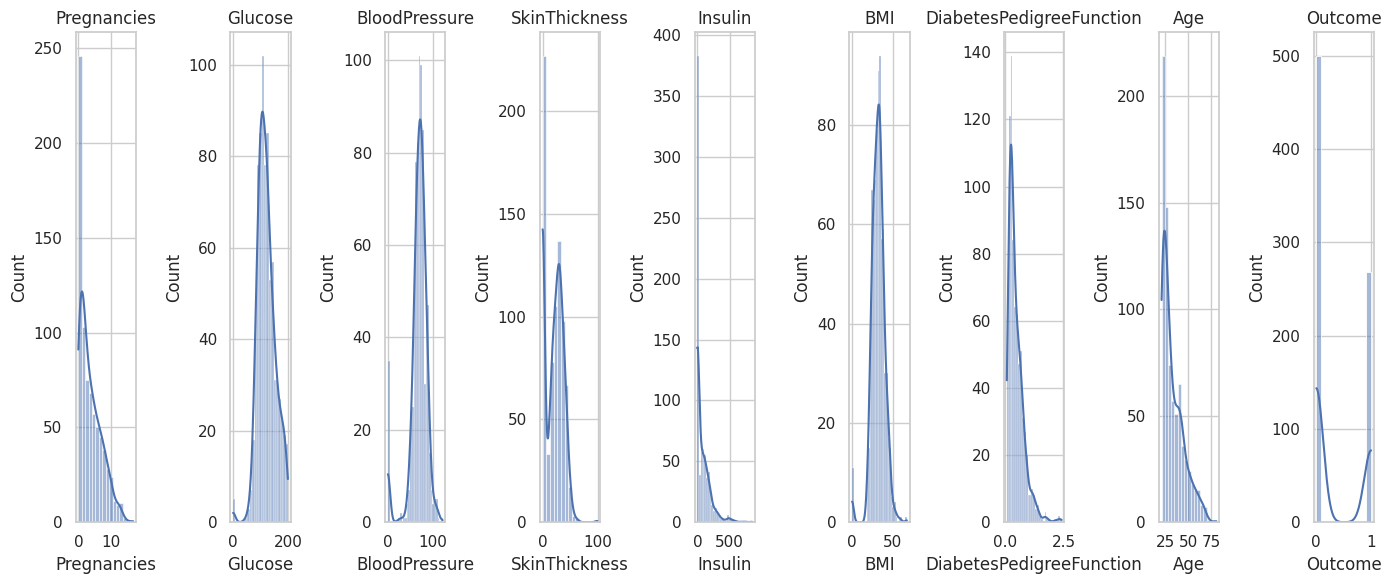

In [7]:
# Visualization of data

# Plotting multiple features distributions
sns.set(style="whitegrid")  # Optional: Set the style of the plots

# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(14, 6))

# Iterate through each feature and plot its distribution
for i, column in enumerate(data.columns):
    sns.histplot(data=data[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

<Axes: >

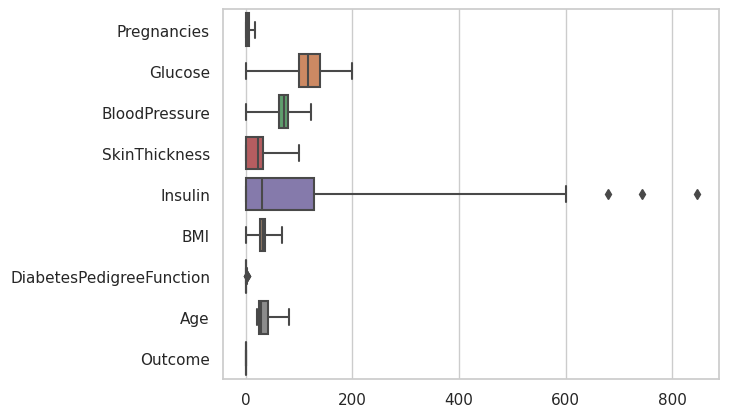

In [8]:
# checking outliers
sns.boxplot(data, orient='h',whis=4.0 )


## Above boxplot shown the outliers in the Insulin features are spread the data in wrong direction due to this the accuracy of model will affect, so we will removing the outlier.

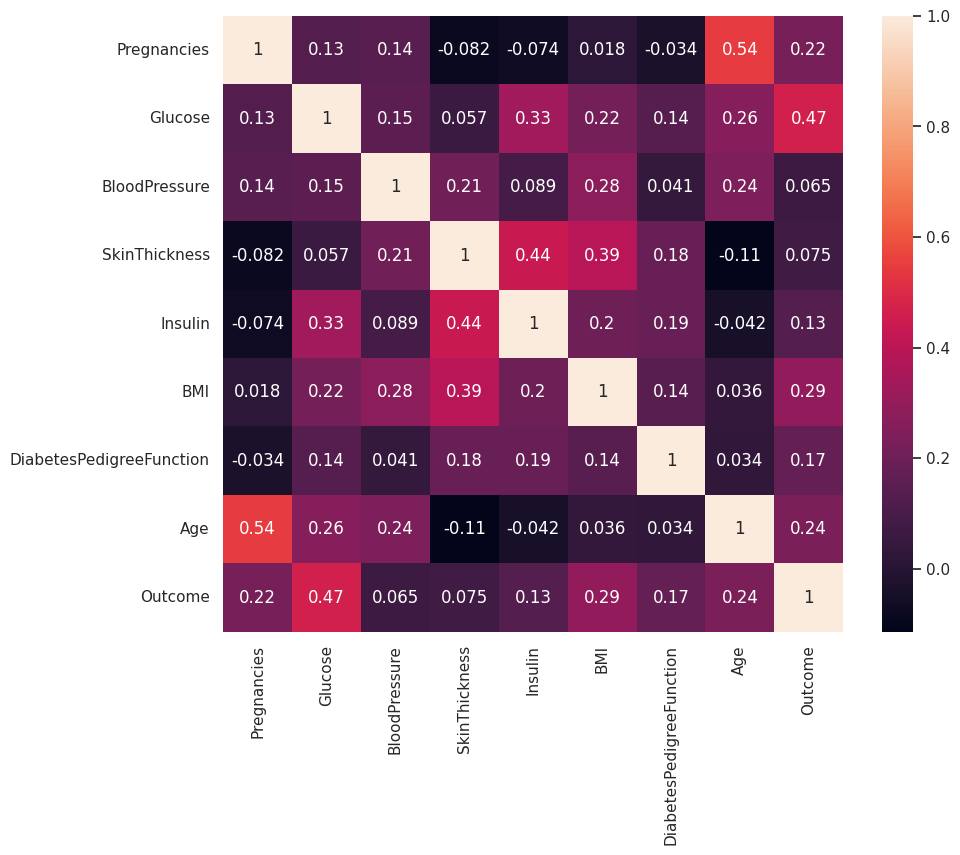

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: >

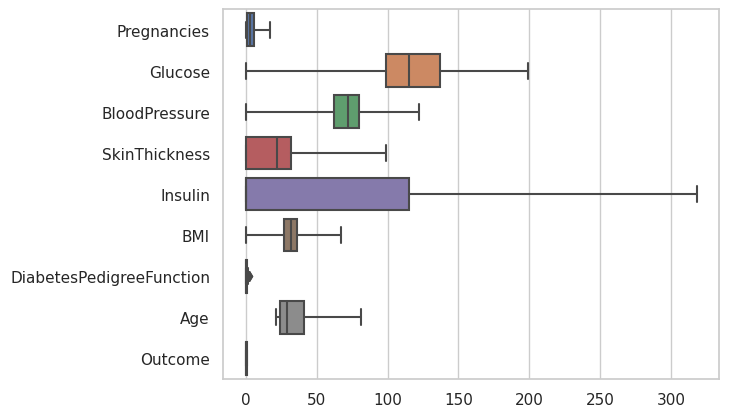

In [10]:

# Compute quartiles
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filter out outliers
data_filtered = data[(data['Insulin'] >= lower_threshold) & (data['Insulin'] <= upper_threshold)]

sns.boxplot(data_filtered, orient='h',whis=4.0 )

## After removing the outliers see the boxplot

In [11]:
data_filtered.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


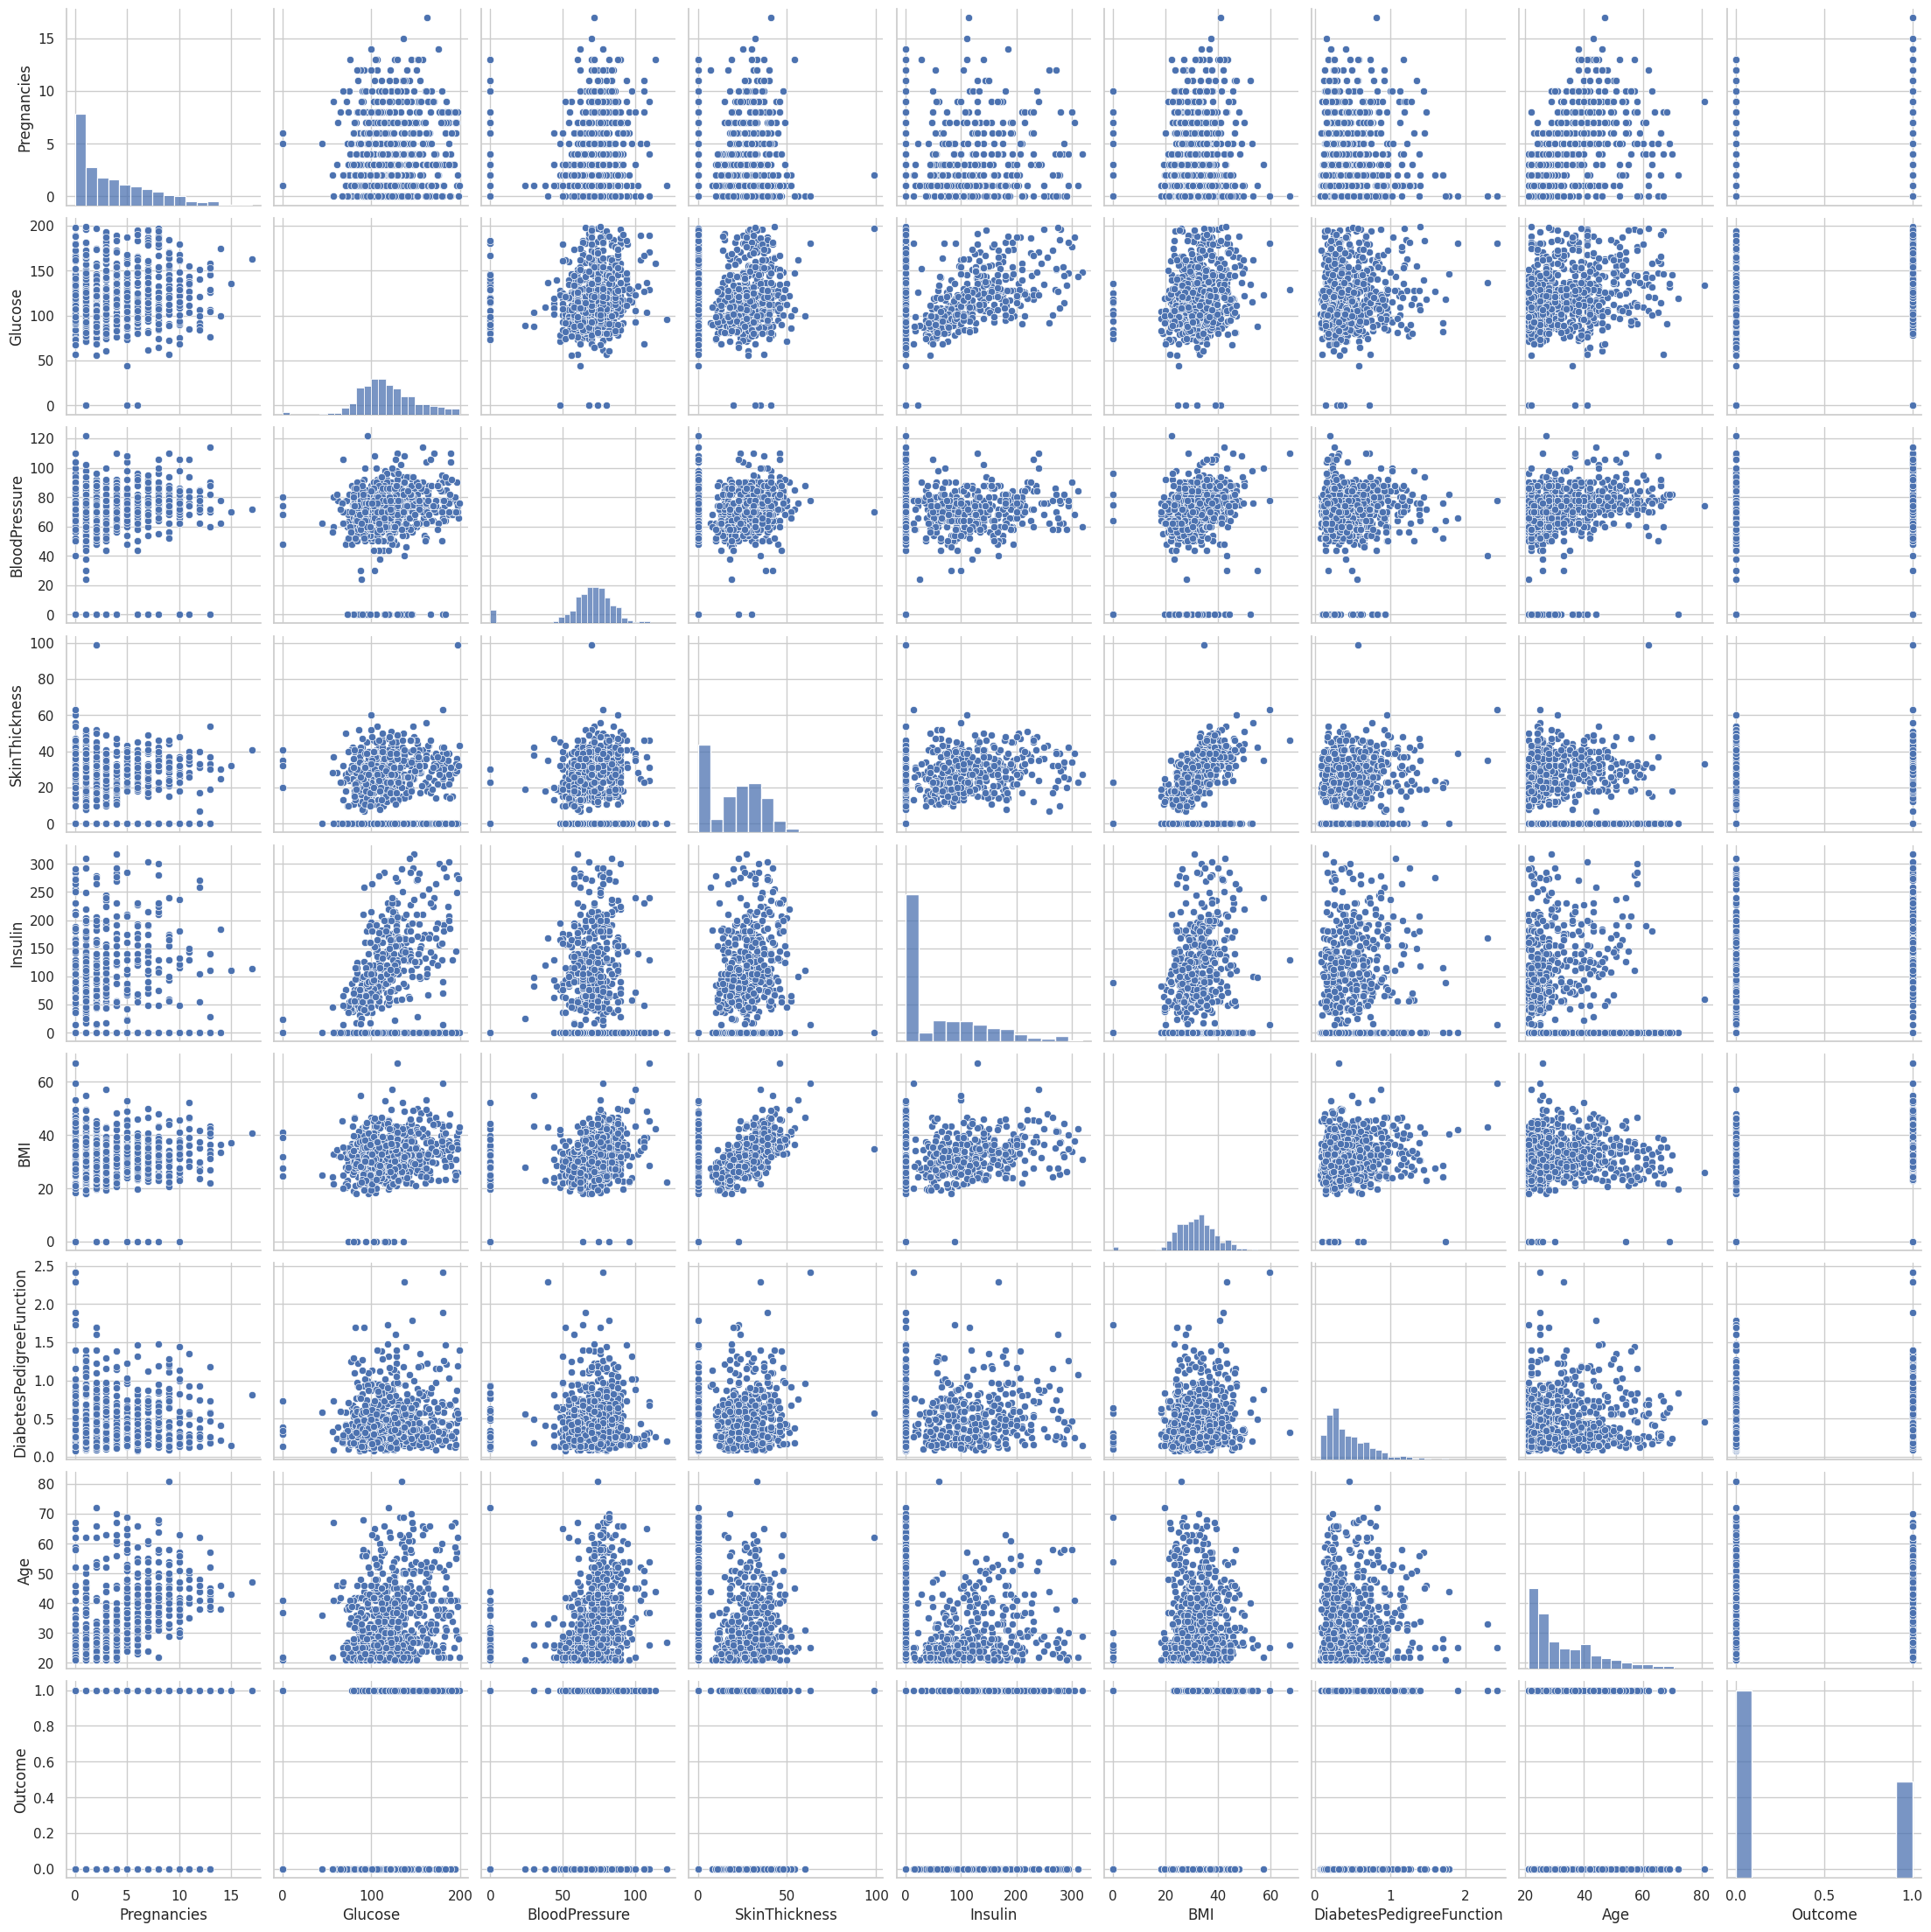

In [12]:
sns.pairplot(data=data_filtered, )
plt.show()

In [13]:
data_filtered['Insulin'].unique()

array([  0,  94, 168,  88, 175, 230,  83,  96, 235, 146, 115, 140, 110,
       245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 304, 142, 128,
        38, 100,  90, 270,  71, 125, 176,  48,  64, 228,  76, 220,  40,
       152,  18, 135,  37,  51,  99, 145, 225,  49,  50,  92,  63, 284,
       119, 204, 155,  53, 114, 105, 285, 156,  78, 130,  55,  58, 160,
       210, 318,  44, 190, 280,  87, 271, 129, 120,  56,  32,  45, 194,
       258, 150,  67,  57, 116, 278, 122,  75,  74, 182, 215, 184,  42,
       132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73, 108,
        43, 167, 249, 293,  66,  89, 158,  84,  72,  59,  81, 196, 275,
       165, 310,  61, 170, 277,  60,  14,  95, 237, 191, 250, 265, 193,
        79,  86, 188, 106,  65, 166, 274,  77, 126, 185,  25,  41, 272,
       144,  15, 183,  91,  46, 159, 200,  22, 291, 178, 127,  16, 112])

In [14]:
# Creating dependent and independent features
X=data_filtered.iloc[:,:-1]
y=data_filtered.iloc[:,-1]


In [15]:
# Train test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.49490384615384614, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.45\nsamples = 491\nvalue = [323, 168]'),
 Text(0.25211538461538463, 0.9, 'x[7] <= 27.5\ngini = 0.306\nsamples = 324\nvalue = [263, 61]'),
 Text(0.0876923076923077, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.133\nsamples = 168\nvalue = [156, 12]'),
 Text(0.07538461538461538, 0.7666666666666667, 'x[5] <= 32.2\ngini = 0.113\nsamples = 166\nvalue = [156, 10]'),
 Text(0.024615384615384615, 0.7, 'x[6] <= 0.672\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(0.012307692307692308, 0.6333333333333333, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.036923076923076927, 0.6333333333333333, 'x[6] <= 0.686\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.024615384615384615, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04923076923076923, 0.5666666666666667, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.12615384615384614, 0.7, 'x[5] <= 32.45\ngini = 0.259\nsamples = 59\nval

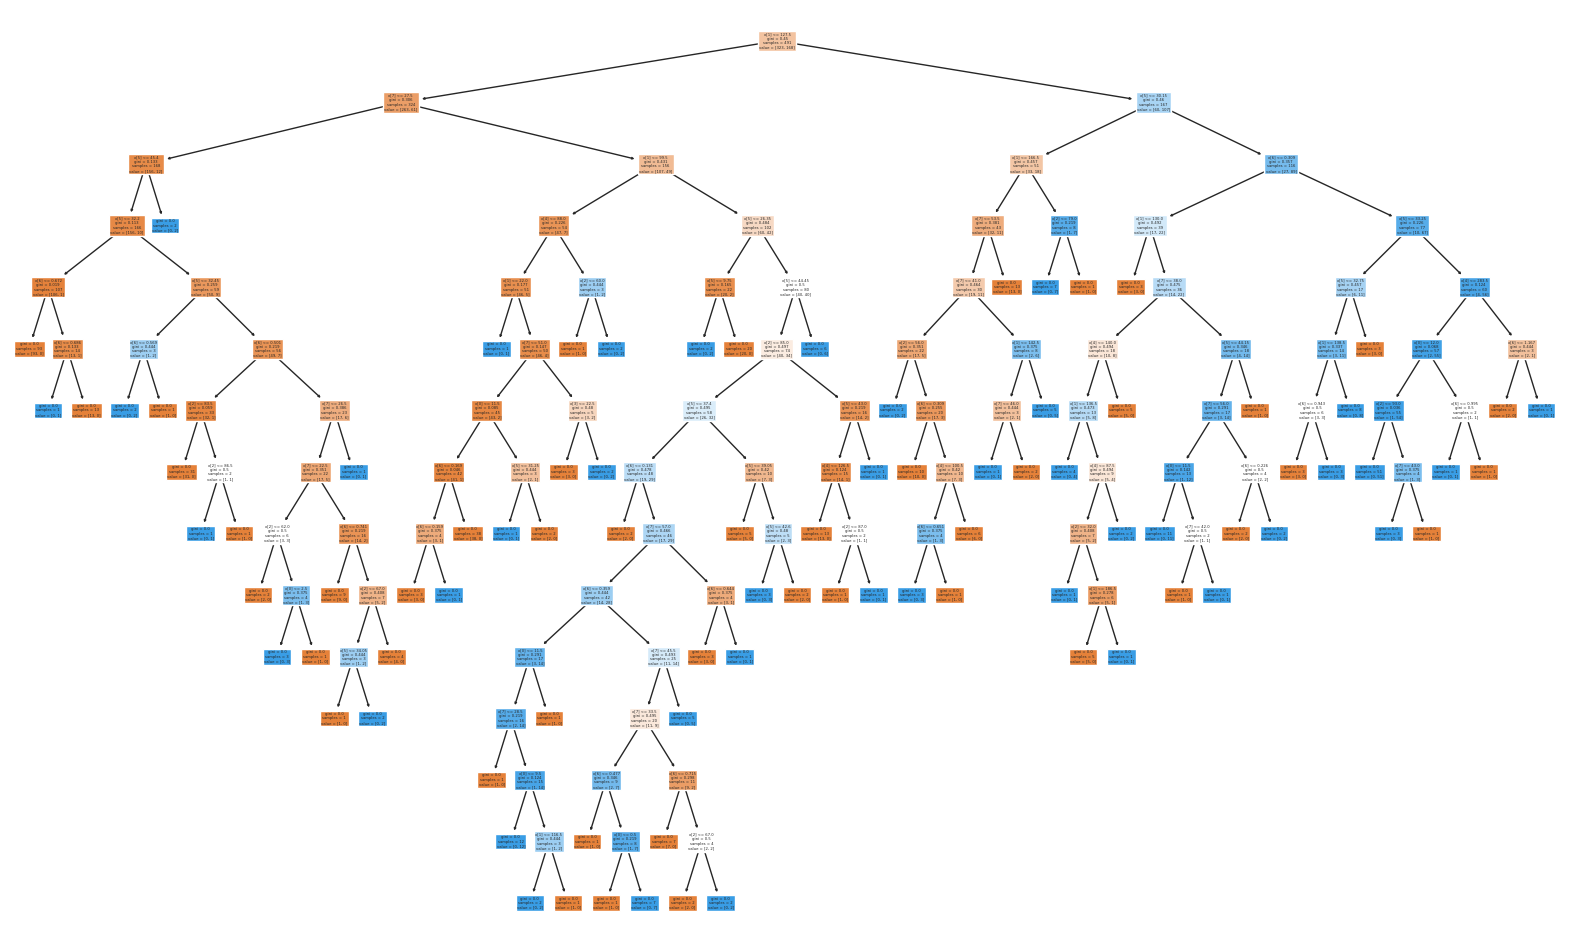

In [17]:
from sklearn import tree

plt.figure(figsize=(20,12))
tree.plot_tree(DT,filled=True)

## Here the depth of tree is 14 so this will lead to lower the accuracy of model

In [18]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1])

In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_pred,y_test)
print(f'Accuracy:{accuracy: .2%}')
print(classification_report(y_pred,y_test))

Accuracy: 67.90%
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       150
           1       0.59      0.52      0.55        93

    accuracy                           0.68       243
   macro avg       0.66      0.65      0.65       243
weighted avg       0.67      0.68      0.67       243



## Before any hyperparameter tunning the result accuracy get from the model is 68 % lets check the best fit parameters select for tunning the model to get more accuracy then this model.

In [20]:
# Decision Tree Hyperparameter tuning
import warnings
warnings.filterwarnings('ignore')

In [28]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2']
}

In [29]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DT,param_grid=parameter,cv=5,scoring='accuracy')

In [30]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=8),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1])

In [33]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_pred,y_test)
print(f'Accuracy:{accuracy: .2%}')
print(classification_report(y_pred,y_test))

Accuracy: 76.54%
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       139
           1       0.79      0.62      0.69       104

    accuracy                           0.77       243
   macro avg       0.77      0.75      0.75       243
weighted avg       0.77      0.77      0.76       243



## here we check the accuracy is incresed upto 77% and max_depth is 6 for it so lets check the tree after changing the depth to best params_

[Text(0.46381578947368424, 0.9285714285714286, 'x[1] <= 127.5\ngini = 0.45\nsamples = 491\nvalue = [323, 168]'),
 Text(0.2324561403508772, 0.7857142857142857, 'x[7] <= 27.5\ngini = 0.306\nsamples = 324\nvalue = [263, 61]'),
 Text(0.11403508771929824, 0.6428571428571429, 'x[5] <= 45.4\ngini = 0.133\nsamples = 168\nvalue = [156, 12]'),
 Text(0.09649122807017543, 0.5, 'x[5] <= 32.2\ngini = 0.113\nsamples = 166\nvalue = [156, 10]'),
 Text(0.03508771929824561, 0.35714285714285715, 'x[6] <= 0.672\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(0.017543859649122806, 0.21428571428571427, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.05263157894736842, 0.21428571428571427, 'x[6] <= 0.686\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.03508771929824561, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07017543859649122, 0.07142857142857142, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.15789473684210525, 0.35714285714285715, 'x[5] <= 32.45

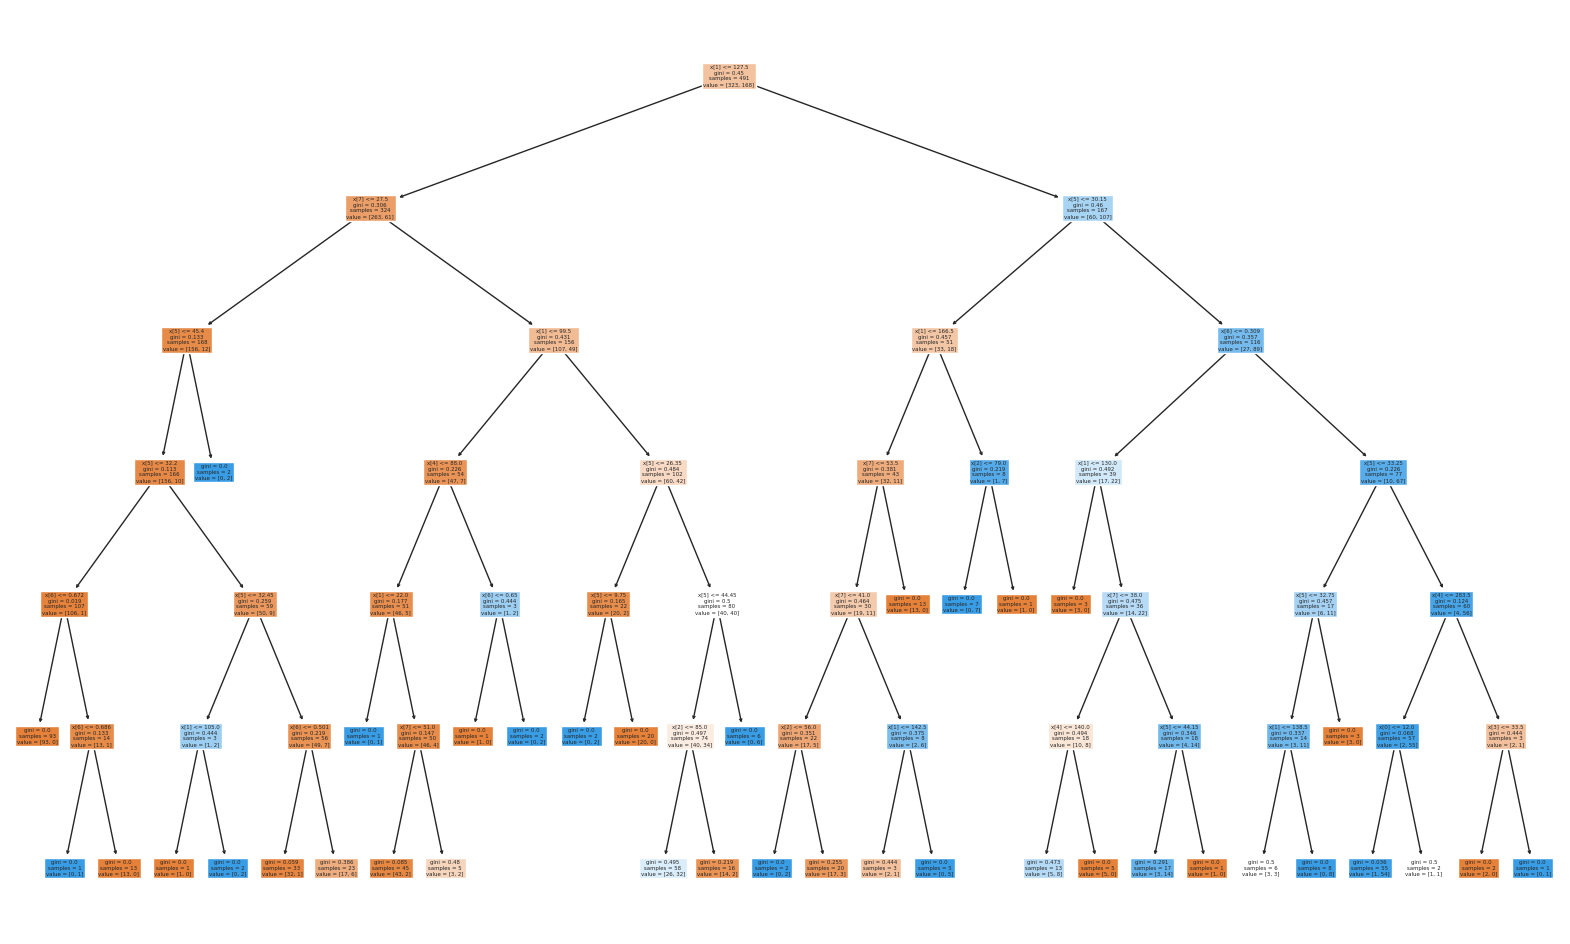

In [34]:
from sklearn import tree
DT=DecisionTreeClassifier(max_depth=6)
DT.fit(X_train, y_train)

plt.figure(figsize=(20,12))
tree.plot_tree(DT,filled=True)